# Challenge

Compute the Absorption spectra of Ethylene C2H4

Hint use ASE to build the molecule

In [1]:
import qepy
from qepy.driver import Driver
from qepy.io import QEInput

In [2]:
additional_files = {
    'C.pz-vbc.UPF' : 'https://pseudopotentials.quantum-espresso.org/upf_files/C.pz-vbc.UPF',
    'H.pz-vbc.UPF' : 'https://pseudopotentials.quantum-espresso.org/upf_files/H.pz-vbc.UPF',
}
from dftpy.formats import download_files
download_files(additional_files)

In [3]:
from ase.build import molecule
ethane = molecule('C2H4')

In [4]:
ethane.get_scaled_positions()

array([[ 0.      ,  0.      ,  0.66748 ],
       [ 0.      ,  0.      , -0.66748 ],
       [ 0.      ,  0.922832,  1.237695],
       [ 0.      , -0.922832,  1.237695],
       [ 0.      ,  0.922832, -1.237695],
       [ 0.      , -0.922832, -1.237695]])

In [ ]:

                'smearing': "'marzari-vanderbilt'"

In [5]:
scf_options = {
    '&control': {'calculation': "'scf'",
                 'prefix': "'C2H4'",
                 'restart_mode': "'from_scratch'",
                 'outdir': "'tmp'",
                 'pseudo_dir' : "'./'",
                },
    '&system': {'celldm(1)': 30,
                'ecutwfc': 25,
                'ibrav': 1,
                'nat': 4,
                'nbnd': 20,
                'ntyp': 2,},
    '&electrons': {'conv_thr': 1.0E-10},
    'atomic_positions {angstrom}': [  ' C 0.        0.        0.66748' ,
                                      ' C 0.        0.       -0.66748' ,
                                      ' H 0.        0.922832  1.237695',
                                      ' H 0.       -0.922832  1.237695',
                                      ' H 0.        0.922832 -1.237695',
                                      ' H 0.       -0.922832 -1.237695'],
    'atomic_species': ['C    12.00000  C.pz-vbc.UPF', 'H     1.00000  H.pz-vbc.UPF'],
    'k_points {gamma}': [],
}

In [6]:
tddfpt_options = {
    '&lr_input': {'outdir': "'tmp'",
                  'prefix': "'C2H4'",
                  'restart': False,
                 },
    '&lr_dav': {'broadening': 0.005,
                'finish': 1.5,
                'num_basis_max': 80,
                'num_eign': 10,
                'num_init': 20,
                'p_nbnd_occ': 4,
                'p_nbnd_virt': 15,
                'poor_of_ram': False,
                'poor_of_ram2': False,
                'reference': 0.5,
                'residue_conv_thr': 1.0E-4,
                'start': 0.0,
                'step': 2.0E-4,
               },
}

In [7]:
scf_in = 'C2H4.scf.in'
tddfpt_in= 'C2H4.tddfpt.in'
QEInput().write_qe_input(scf_in, qe_options=scf_options, prog='pw')
QEInput().write_qe_input(tddfpt_in, qe_options=tddfpt_options, prog='davidson')

In [8]:
driver = Driver(scf_in, task='scf', logfile='tmp.scf.out')

In [9]:
driver.scf()

-24.296131694393857

In [10]:
driver.save()

In [11]:
driver = Driver(tddfpt_in, task='tddfpt_davidson', logfile='tmp.tddfpt.out')

In [12]:
driver.scf()

0.0

Text(0, 0.5, 'Intensity (arb. units)')

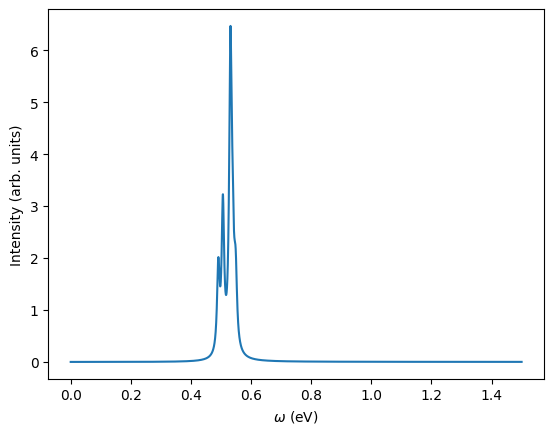

In [15]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('C2H4.plot.dat')
plt.plot(data[:,0], data[:,1])
plt.xlabel(r'$\omega$ (eV)')
plt.ylabel(r'Intensity (arb. units)')